In [1]:
# IMPORTS

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

In [2]:
# DEGREE DISTRIBUTION

# Method that plots the degree distribution of a graph
# Taken from homework assignment 1
def plot_degree_distribution(graph):
    degree_dict = dict(graph.degree())
    degree_ordered = OrderedDict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))
    degree_sequence = list(degree_ordered.values())
    prob, bin_edges = np.histogram(degree_sequence, bins=range(1,np.max(degree_sequence)+2), density=True)
    plt.loglog(bin_edges[:-1], prob, '.', marker='x')
    plt.title("Probability density function")
    plt.xlabel("degree")
    plt.ylabel("probability")
    plt.show()
    

In [202]:
# Method that generates the graph by preferential attachment with fitness
# Takes in a time step t, intial size m0, local world size M, a number of links for each incoming node to have m, and probability of addition p
# Creates an intial small graph of m0 nodes and for t time steps either adds with prob p or deletes a node with prob 1-p
# If a node is added, a random local world of size M is selected and the incoming node randomly selects m of those nodes to link to
# therefore, it must be true that M > m
# 0.5 < p <= 1 has a growing network, 0 <= p < 0.5 has a shrinking network, and p = 0.5 has a static network size
# If a node is deleted, a reandomly selected node and all its adjacent edges are removed
# Each incoming node randomly links to m nodes and it randomly given a fitness
# Returns a graph
def generate_local_world_node_deletion_graph(time, m0, M, m, p):
    # Create the graph
    g = nx.Graph()
    
    # Add the first note
    g.add_node(0)
    
    # For the number of initial nodes given, add a node and an edge to the first node
    for i in range(1, m0):
        g.add_node(i)
        g.add_edge(0,i)
        
    # Perform t time steps
    for t in range(time):
        
        if(len(g.nodes()) == 0):
            print('Graph is Empty')
            break
        
        # Randomly select a number from the uniform(0,1) dist
        num = np.random.random()
        
        # If num <= p, add a node; otherwise delete a node

        if(num <= p):
            # Randomly select M nodes from the whole network to form a local network
            local_world = []
            if(len(g.nodes) <= M):
                local_world = g.nodes()
            else:
                local_world = np.random.choice(g.nodes(), size = M, replace = False)
        
            # Select m targets from the local world for the to-be-added node to link to
            targets = select_targets(g, local_world, m)

            # Add a node
            g.add_node(t)

            # Add an edge from the new node to each of the m selected targets
            for target in targets:
                g.add_edge(target, t)

        else:
            # Randomly remove a node in g
            if len(g.nodes()) == 1:
                print('Graph is Empty')
                break
            else:
                g.remove_node(np.random.choice(g.nodes()))
    
    return g
        
# Method that selects the nodes for an incoming node to link to 
# Takes in a graph and a number of links
# Determines the probability of each link being linked to and then selects m nodes to be linked to
# Returns the m selected links
# Reused from homework assignment 1
def select_targets(g, local_world, m):
    
    # Check if feasible
    if (len(local_world) < m) and len(local_world) > 0:
        return local_world
        
    # Compute the sum of degrees
    sum_degree = 0
    
    # Sums the degrees of all nodes in local_world
    for i in local_world:
        sum_degree += g.degree(i)
        
    if sum_degree == 0:
        return []
        
    # Compute probabilities
    # Prob of a link is (M/N)*(degree/sum_degrees) where M is local world size and N is total graph size
    probabilities = []
    for u in local_world:
        probabilities.append((g.degree(u)/sum_degree))
        
    # Sample w/o replacement
    selected = np.random.choice(local_world, size = m, replace = False, p = probabilities)
    
    return selected
        
        

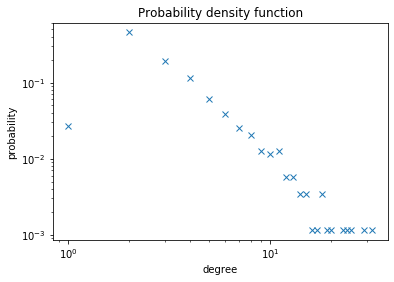

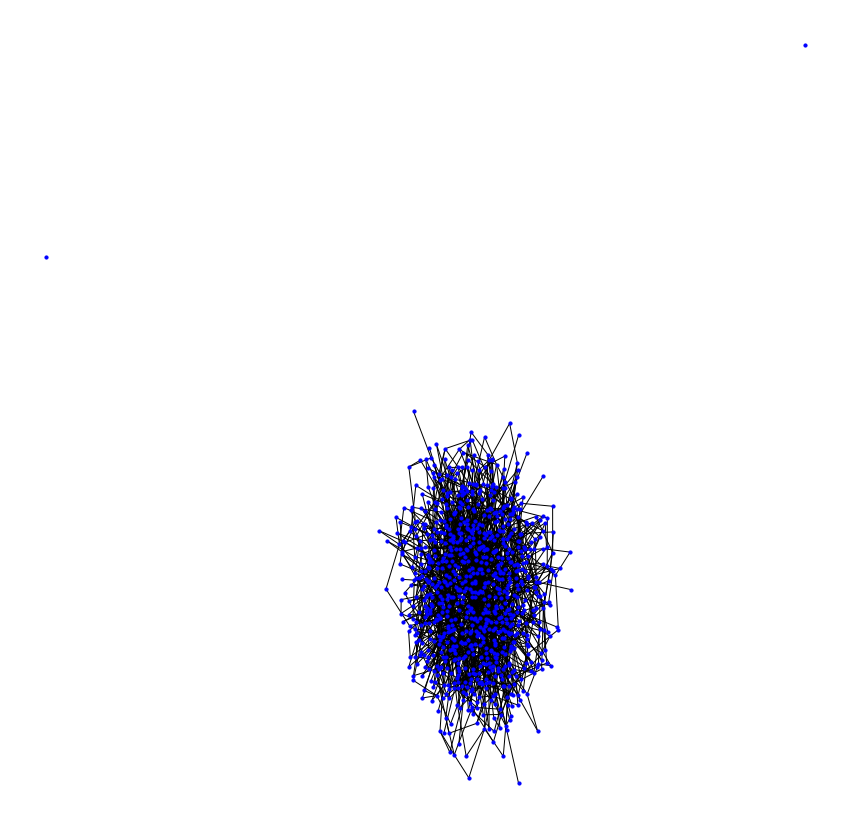

In [214]:
g = generate_local_world_node_deletion_graph(1000, 3, 15, 2, 0.95)

plot_degree_distribution(g)

plt.figure(figsize=(15,15))
plt.axis('off')
pos = nx.spring_layout(g)
nx.draw_networkx(g, pos, with_labels=False, node_size=10, node_color='blue')